In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class TDLearning:
    def __init__(self, n_states, n_actions, alpha, gamma):
        """
        Initializes a Q-Learning agent.

        Args:
            n_states (int): The number of states in the environment.
            n_actions (int): The number of actions available to the agent.
            alpha (float): The learning rate (0 <= alpha <= 1).
            gamma (float): The discount factor (0 <= gamma <= 1).

        Returns:
            None
        """
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.q = np.zeros((n_states, n_actions))
        self.errors = np.zeros(0)
        self.actions = np.zeros(0)

    def update(self, states: np.ndarray, action: int, reward: int, next_states: np.array):
        """
        Update the Q-values based on the given states, action, reward, and next states.

        Parameters:
        states (np.ndarray): The current state(s) of the agent.
        action (int): The action taken by the agent.
        reward (int): The reward received after taking the action.
        next_states (np.array): The next state(s) of the agent.

        Returns:
        None
        """

        self.actions = np.hstack((self.actions, action))
        next_action = np.argmax(self.q[next_states].sum(axis=0))
        td_error = reward + np.sum(self.gamma * self.q[next_states, next_action] - self.q[states, action])
        self.q[states, action] += self.alpha * td_error
        self.errors = np.hstack((self.errors, td_error))

    def get_action(self, states, epsilon):
        """
        Selects an action based on the given state and epsilon value.

        Parameters:
        state (int): The current state.
        epsilon (float): The exploration rate.

        Returns:
        int: The selected action.
        """
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_actions)
        else:
            return np.argmax(self.q[states].sum(axis=0))

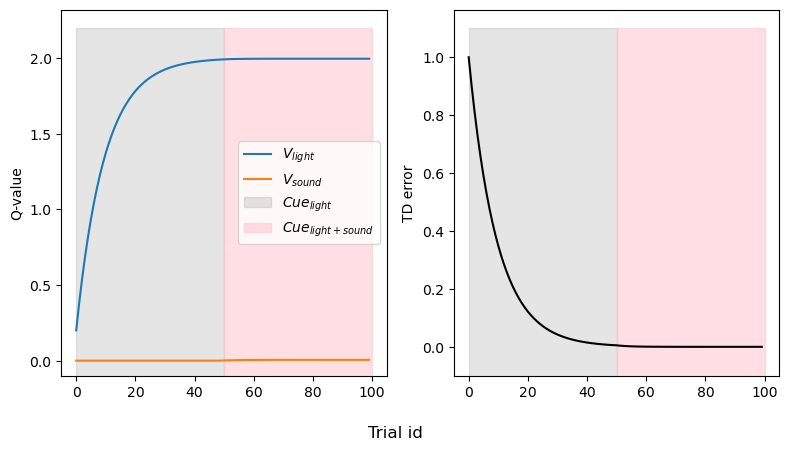

In [10]:
n_states = 2
n_actions = 2
tdl = TDLearning(n_states, n_actions, 0.2, 0.5)
count = 0
n_initial_learning_trials: int = 50
n_paired_learning_trials: int = 50
n_sound_trials: int = 0
values = np.empty((n_states, n_initial_learning_trials+n_paired_learning_trials+n_sound_trials))

states = np.array([0])
for i in range(count, count + n_initial_learning_trials):
    action = tdl.get_action(states, 0)
    tdl.update(states=states, action=action, reward=1, next_states=states)
    values[:, i] = tdl.q[:, 0]
    count += 1
states = np.array([0, 1])
for i in range(count, count + n_paired_learning_trials):
    action = tdl.get_action(states, 0)
    tdl.update(states=states, action=action, reward=1, next_states=states)
    values[:, i] = tdl.q[:, 0]
    count += 1
states = np.array([1])
for i in range(count, count + n_sound_trials):
    action = tdl.get_action(states, 0)
    tdl.update(states=states, action=action, reward=1, next_states=states)
    values[:, i] = tdl.q[:, 0]
    count += 1


fig, axs = plt.subplots(1, 2, figsize=(8, 4.5), sharex=True)

axs[0].plot(values.T, label=[r'$V_{light}$', r'$V_{sound}$'])
axs[0].set_ylabel('Q-value')
axs[0].fill_between([0, n_initial_learning_trials], -0.2, 2.2, color='gray', alpha=0.2,
                    label=r'$Cue_{light}$')
axs[0].fill_between([n_initial_learning_trials, n_initial_learning_trials + n_paired_learning_trials], -0.2, 2.2, color='pink', alpha=0.5,
                    label=r'$Cue_{light+sound}$')
axs[0].set_ylim(bottom=-0.1)
axs[0].legend()

axs[1].plot(tdl.errors, color='k')
axs[1].fill_between([0, n_initial_learning_trials], -0.2, 1.1, color='gray', alpha=0.2,
                    label=r'$Cue_{light}$')
axs[1].fill_between([n_initial_learning_trials, n_initial_learning_trials + n_paired_learning_trials], -0.2, 1.1, color='pink', alpha=0.5,
                    label=r'$Cue_{light+sound}$')
axs[1].set_ylabel('TD error')
axs[1].set_ylim(bottom=-0.1)
fig.supxlabel('Trial id')
fig.tight_layout()